In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [2]:
root_path = "C:/Users/gunnar/src/data/ESDC/esdc-8d-0.25deg-46x90x90-1.0.1_2/data"

metadata = ["project_name","long_name","url"] 
cols_to_record = metadata + ['vname','miny','maxy']
out = pd.DataFrame(columns= cols_to_record)

In [3]:
cols_to_record

['project_name', 'long_name', 'url', 'vname', 'miny', 'maxy']

In [4]:
for root, sub_dirs, files in os.walk(root_path):
            for sub_dir in sub_dirs:
                sub_dir_path = os.path.join(root_path, sub_dir).replace("\\", "/") 
                file_names = os.listdir(sub_dir_path)
                miny  = 3000
                maxy = 0
                dat = xr.open_dataset(os.path.join(sub_dir_path,file_names[0]))
                metadata_list=[None]*len(cols_to_record)
                metadata_dict = dict()
                cnt = 0
                for key in metadata:
                    try: 
                        metadata_list[cnt]=dat[sub_dir].attrs[key]
                        metadata_dict[cols_to_record[cnt]] = dat[sub_dir].attrs[key]
                    except:
                        print("Err", sub_dir,key)
                        metadata_dict[cols_to_record[cnt]] = None
                    cnt+=1
                for file in file_names:
                    x = int(file[0:4])
                    miny = x if x < miny else miny
                    maxy = x if x > maxy else maxy
                metadata_dict["miny"]=miny
                metadata_dict["maxy"]=maxy
                metadata_dict["vname"]=sub_dir
                tmp = pd.DataFrame(metadata_dict, index=[0])
                out = pd.concat([out,tmp], ignore_index = True)      

Err burnt_area long_name
Err country_mask project_name
Err country_mask long_name
Err country_mask url
Err precipitation long_name
Err srex_mask project_name
Err srex_mask url
Err water_mask project_name
Err water_mask url


In [5]:
out

,long_name,maxy,miny,project_name,url,vname
0,aerosol optical thickness at 1610 nm,2011,2002,ESA Aerosol CCI,http://www.esa-aerosol-cci.org/,aerosol_optical_thickness_1610
1,aerosol optical thickness at 550 nm,2011,2002,ESA Aerosol CCI,http://www.esa-aerosol-cci.org/,aerosol_optical_thickness_550
2,aerosol optical thickness at 555 nm,2011,2002,ESA Aerosol CCI,http://www.esa-aerosol-cci.org/,aerosol_optical_thickness_555
3,aerosol optical thickness at 659 nm,2011,2002,ESA Aerosol CCI,http://www.esa-aerosol-cci.org/,aerosol_optical_thickness_659
4,aerosol optical thickness at 865 nm,2011,2002,ESA Aerosol CCI,http://www.esa-aerosol-cci.org/,aerosol_optical_thickness_865
5,2 metre temperature,2011,2001,ERAInterim,http://www.ecmwf.int/en/research/climate-reana...,air_temperature_2m
6,Bare Soil Evaporation,2011,2001,GLEAM,http://www.gleam.eu,bare_soil_evaporation
7,black sky albedo for visible wavebands,2011,2001,GlobAlbedo,http://www.globalbedo.org/,black_sky_albedo
8,None,2011,2001,GFED4,http://www.globalfiredata.org/,burnt_area
9,None,2001,2001,None,None,country_mask


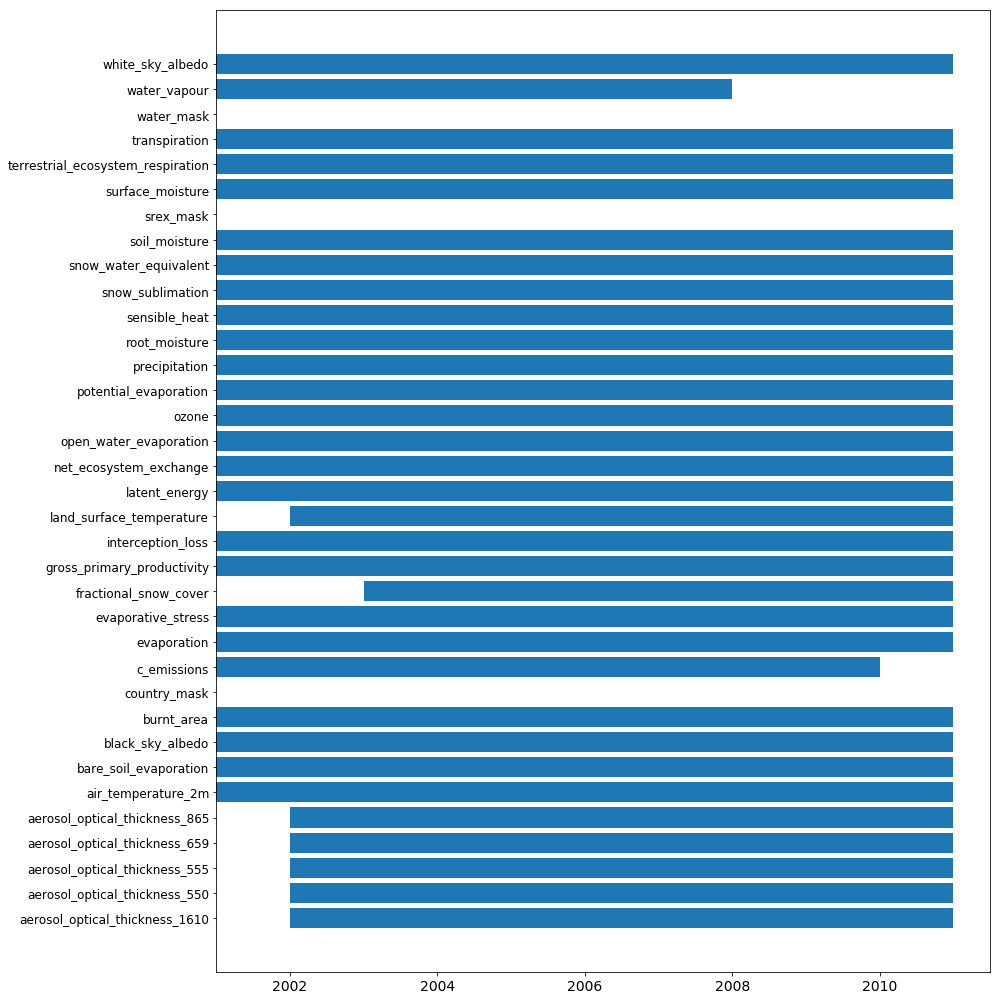

In [6]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=12)
fig = plt.figure(figsize = [14,14])
plt.title( '')
plt.barh(out.vname, width=out.maxy-out.miny, left=out.miny)
plt.tight_layout()
fig.savefig('ESDL_temporal_cover.png')

In [8]:
out.to_csv('ESDL_time_cover.csv',columns=cols_to_record)